#Baixar arquivo de Dados


In [2]:
!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


#importação

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Limpeza de dados em um dataset real (dados do titanic)
- Para começar, vamos usar o dataset do Titanic
    - [Titanic](https://www.kaggle.com/competitions/titanic/data)
- Variáveis
    - Survival:	Sobrevivência (0 = Não, 1 = Sim)
    - Pclass: Classe do bilhete	(1 = 1º, 2 = 2º, 3 = 3º)
    - Sex: Gênero
    - Age: Idade em anos
    - Sibsp: Nº de irmãos/cônjuges a bordo do Titanic
    - Parch: Nº de pais/filhos a bordo do Titanic
    - Ticket: Número do bilhete
    - Fare:	Tarifa do passageiro
    - Cabin: Número da cabine
    - Embarked:	Porto de embarcação	(C = Cherbourg, Q = Queenstown, S = Southampton)

# Leitura do Arquivo

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train = pd.read_csv(r'/content/drive/MyDrive/projetos/titanic/train.csv')

# Exibição do Dados

In [6]:
# Aparecer 5 primeiros dataframe
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#Analisando os Dados


In [8]:
#Verificar as informação
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Resumo Estatístico
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Cardialidade (quantidade de valores vazios em cada ua das colunas)
train.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [11]:
#Contagem total de NaN
total_nan = train.isna().sum()

#print
total_nan

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Tratamento de Dados


## Analisando Embarked

In [12]:
# Verificando os Valores Vazios do Embarked
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
# Tratando valores nulos do Embarked
train.loc[train.Embarked.isnull(),'Embarked'] = 'S'

In [14]:
# Lista de IDs específicos
ids_especificos = [62, 830]

# Filtrando o DataFrame para pegar apenas os IDs específicos
train_filtrado = train[train['PassengerId'].isin(ids_especificos)]

print(train_filtrado)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28        S  
829  female  62.0      0      0  113572  80.0   B28        S  


In [15]:
#Verificando info dos Embarked
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Analisando Age


In [16]:
train.Age.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: >

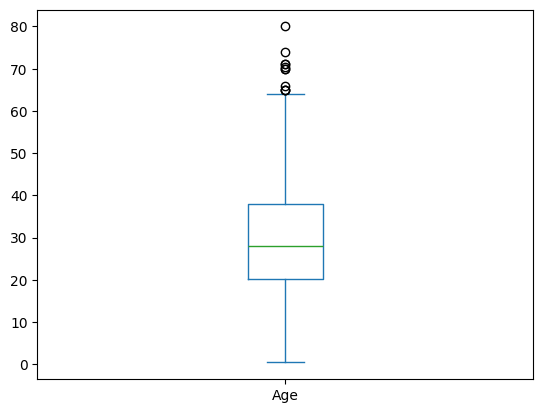

In [17]:
#Visualizar por gráfico boxplot
train.Age.plot.box()

In [18]:
#Verificar para tirar média de didade por Pclass
train.groupby('Pclass')['Age'].median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [19]:
#Verificar a mediana do gênero
train.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [20]:
train.groupby(['Pclass','Sex'])['Age'].transform('median')

,Age
0,25.0
1,35.0
2,21.5
3,35.0
4,25.0
...,...
886,30.0
887,35.0
888,21.5
889,40.0


In [21]:
#Criando nova coluna de Age
train['Age_Check'] = train.groupby(['Pclass','Sex'])['Age'].transform('median')

In [22]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Check
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21.5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,25.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,40.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,25.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,21.5
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,28.0


In [23]:
#Visualizar a base do Age novamente com valores Nulos
train[train.Age.isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Check
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,25.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,30.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,21.5
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,25.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,21.5
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,25.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,35.0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,21.5
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,25.0
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,25.0


In [24]:
#Usando esse valor na idade
train['Age'] = train.Age.fillna(train.groupby(['Pclass','Sex'])['Age'].transform('median'))

In [25]:
#Verificando colunas
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Check'],
      dtype='object')

In [26]:
#Apagar Age_check
train = train.drop(['Age_Check'],axis=1)

In [27]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
#Verificando colunas novamente
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Analisando Cabin

In [30]:
#Verificando info do cabin
train.Cabin

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [31]:
#Nova verificação Cabin
train.Cabin.value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
#Eliminando coluna
titanic_coluna = train.drop('Cabin',axis=1)

In [34]:
# Verificando os Valores Vazios do Cabin
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Para eliminar a coluna Cabin do DataFrame df, o problema e o DataFrame df não está sendo modificado de forma permanente. No pandas, o método drop retorna uma nova versão do DataFrame sem a coluna, e a versão original do DataFrame permanece intacta, a menos que atribua o resultado de volta ao DataFrame ou usar o parâmetro inplace=True.

In [35]:
train.drop('Cabin', axis=1, inplace=True)

In [36]:
# Verificando os Valores Vazios do Cabin novamente
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [37]:
#Verificando os NaNs do Cabin
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Explorando os Dados

## Total de passageiros


Vamos começar descobrindo o total de passageiros a bordo do Titanic.


In [38]:
total_passageiros = train.shape[0]
print(f"Total de passageiros: {total_passageiros}")

Total de passageiros: 891


In [39]:
total_mortos = train[train['Survived'] == 0].shape[0]
print(f"Total de mortos: {total_mortos}")

Total de mortos: 549


In [40]:
# Contando o número de passageiros por gênero
passageiros_por_genero = train['Sex'].value_counts()

# Exibindo o resultado
print(passageiros_por_genero)

Sex
male      577
female    314
Name: count, dtype: int64


## **Passo 1:** Criando categorias para crianças e idosos


No conjunto de dados do Titanic, a coluna Sex só contém as categorias `male (homens)` e `female (mulheres)`. Para identificar crianças e idosos, precisamos usar a coluna `Age (idade)` e criar uma nova categorização com base nela.

<br>
Vamos definir:

    Crianças: Passageiros com menos de 12 anos.

    Adolescente: Passageiros de 12 a 17 anos.

    Idosos: Passageiros com 50 anos ou mais.

    Adultos: Passageiros entre 18 e 49 anos.

In [41]:
# Criando uma nova coluna 'Categoria' com base na idade
train['Categoria'] = np.where(
    train['Age'] < 12, 'Criança',  # Crianças: menos de 12 anos
    np.where(
        (train['Age'] >= 12) & (train['Age'] <= 17), 'Adolescente',  # Adolescentes: 12 a 17 anos
        np.where(
            train['Age'] >= 50, 'Idoso',  # Idosos: 50 anos ou mais
            np.where(
                train['Sex'] == 'female', 'Mulher',  # Mulheres adultas
                'Homem'  # Homens adultos
            )
        )
    )
)

# Exibindo as primeiras linhas para verificar a nova coluna
train[['Age', 'Sex', 'Categoria']].head()

,Age,Sex,Categoria
0,22.0,male,Homem
1,38.0,female,Mulher
2,26.0,female,Mulher
3,35.0,female,Mulher
4,35.0,male,Homem


## **Passo 2:** Contando o número de passageiros por categoria



Agora que criamos a coluna `Categoria`, podemos contar quantos passageiros há em cada grupo.

In [42]:
# Contando o número de passageiros por categoria
contagem_por_categoria = train['Categoria'].value_counts()

# Exibindo o resultado
print(contagem_por_categoria)

Categoria
Homem          467
Mulher         237
Idoso           74
Criança         68
Adolescente     45
Name: count, dtype: int64


Vamos verificar as tabelas de para ver todas as colunas

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Categoria
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Homem
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mulher
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Mulher
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mulher
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Homem


## Passo 3: Visualizando a distribuição por categoria

Aqui veremos um gráfico para visualizar a distribuição de passageiros por categoria.

<ipython-input-44-0a3221c14775>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Categoria', data=train, palette='Blues', order=['Criança', 'Adolescente', 'Idoso', 'Mulher', 'Homem'])


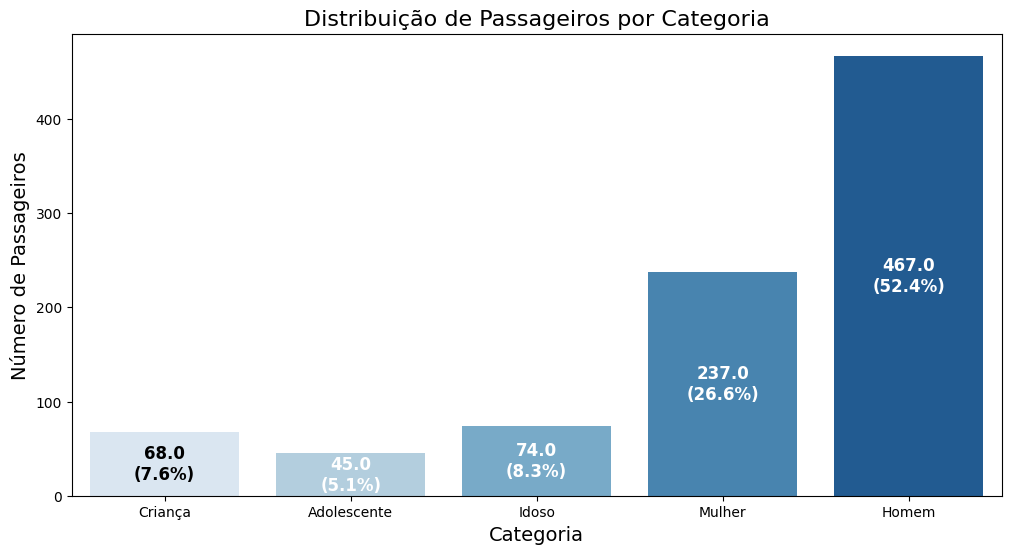

In [44]:
# Calculando o total de passageiros
total_passageiros = train.shape[0]

# Configurando o gráfico
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Categoria', data=train, palette='Blues', order=['Criança', 'Adolescente', 'Idoso', 'Mulher', 'Homem'])
plt.title('Distribuição de Passageiros por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Número de Passageiros', fontsize=14)

# Adicionando porcentagens dentro das barras
for i, p in enumerate(ax.patches):
    altura = p.get_height()
    porcentagem = (altura / total_passageiros) * 100
    cor_texto = 'black' if i == 0 else 'white'  # Fonte preta apenas para crianças
    ax.annotate(
        f'{altura}\n({porcentagem:.1f}%)',  # Texto: valor e porcentagem
        (p.get_x() + p.get_width() / 2, altura / 2),  # Posição do texto (no meio da barra)
        ha='center', va='center', fontsize=12, color=cor_texto, fontweight='bold'  # Fonte maior e em negrito
    )

plt.show()

**Resultado do gráfico:**

O gráfico mostrará barras para cada categoria, com a altura representando o número de passageiros. A ordem será: Criança, Adolescentes, Idoso, Mulher e Homem.
Explicação do gráfico

    Crianças: A barra será menor, indicando que havia poucas crianças a bordo.

    Adolescente: A barra será um pouco maior que a das crianças, mas menor que a dos adultos.

    Idosos: A barra será menor, mostrando que havia poucos idosos a bordo.

    Mulheres: A barra será maior que a de crianças, adolescentes e idosos, mas menor que a de homens.

    Homens: A barra será a maior, indicando que a maioria dos passageiros eram homens adultos.

Com essa categorização, podemos ver claramente a distribuição dos passageiros do Titanic por faixa etária e gênero. Isso nos ajuda a entender melhor a composição dos passageiros e como diferentes grupos podem ter sido afetados pelo desastre.


# Distribuição por Classe (Pclass)

## Verificar o número de classes

In [45]:
# Verificando as classes únicas na coluna 'Pclass'
classes_unicas = train['Pclass'].unique()

# Exibindo o resultado
print(f"Classes existentes: {classes_unicas}")

Classes existentes: [3 1 2]


No conjunto de dados do Titanic, a coluna Pclass representa a classe do passageiro. Existem 3 classes no total: `1ª classe, 2ª classe e 3ª classe.`

Vamos ver quantos passageiros estavam em cada classe (1ª, 2ª e 3ª).


## Número de Passageiros em Cada Classe

In [46]:
# Contando o número de passageiros por classe
distribuicao_classe = train['Pclass'].value_counts().sort_index()

# Exibindo o resultado
print(distribuicao_classe)

Pclass
1    216
2    184
3    491
Name: count, dtype: int64


`A 2ª classe` tinha o menor número de passageiros, `com 184,` enquanto a `3ª classe` era a mais populosa, com `491 passageiros`.


<ipython-input-47-7a51d0a60a79>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=train, palette='Blues')


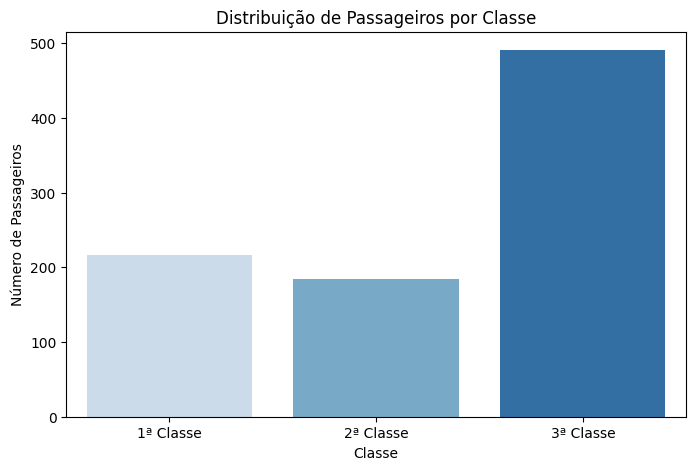

In [47]:
, # Configurando o gráfico
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=train, palette='Blues')
plt.title('Distribuição de Passageiros por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Passageiros')
plt.xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'])
plt.show()

**Por que a 2ª classe tinha menos passageiros?**

A **2ª classe** era uma classe intermediária, menos luxuosa que a **1ª classe**, mas mais cara que a **3ª**. Isso pode explicar por que ela atraía menos passageiros:

  - Passageiros com mais recursos provavelmente optavam pela 1ª classe.

  - Passageiros com menos recursos optavam pela 3ª classe.

  - A 2ª classe ficava em uma posição intermediária, o que pode ter feito com que menos pessoas escolhessem essa opção.

## Distribuição de Categorias por Classe


    Crianças: Menos de 18 anos.

    Idosos: 50 anos ou mais.

    Mulheres: Passageiras do sexo feminino com 18 anos ou mais.

    Homens: Passageiros do sexo masculino com 18 anos ou mais.

In [48]:
# Agrupando por classe e categoria
distribuicao_por_classe_categoria = train.groupby(['Pclass', 'Categoria']).size().unstack()

# Exibindo o resultado
print(distribuicao_por_classe_categoria)

Categoria  Adolescente  Criança  Homem  Idoso  Mulher
Pclass                                               
1                    8        4     89     44      71
2                    6       17     84     19      58
3                   31       47    294     11     108


    Crianças:

        1ª Classe: 4 crianças.

        2ª Classe: 17 crianças.

        3ª Classe: 47 crianças.

A maioria das crianças estava na 3ª classe, que era a mais econômica. Isso pode indicar que famílias com menos recursos financeiros viajavam na 3ª classe.

    Adolescente:
         
       1ª Classe: 8 crianças.

       2ª Classe: 6 crianças.

       3ª Classe: 31 crianças.



    Homens:

        1ª Classe: 89 homens.

        2ª Classe: 84 homens.

        3ª Classe: 294 homens.

A maioria dos homens estava na 3ª classe. Isso pode refletir a composição demográfica da época, onde muitos homens viajavam sozinhos ou em busca de trabalho.

    Idosos:

        1ª Classe: 44 idosos.

        2ª Classe: 19 idosos.

        3ª Classe: 11 idosos.

A maioria dos idosos estava na 1ª classe, o que faz sentido, já que passageiros mais velhos e com mais recursos financeiros provavelmente optavam por uma viagem mais confortável.

    Mulheres:

        1ª Classe: 71 mulheres.

        2ª Classe: 58 mulheres.

        3ª Classe: 108 mulheres.

A maioria das mulheres estava na 3ª classe, mas a 1ª classe também tinha uma quantidade significativa. Isso pode indicar que mulheres de diferentes classes sociais viajavam no Titanic.

<Figure size 1200x600 with 0 Axes>

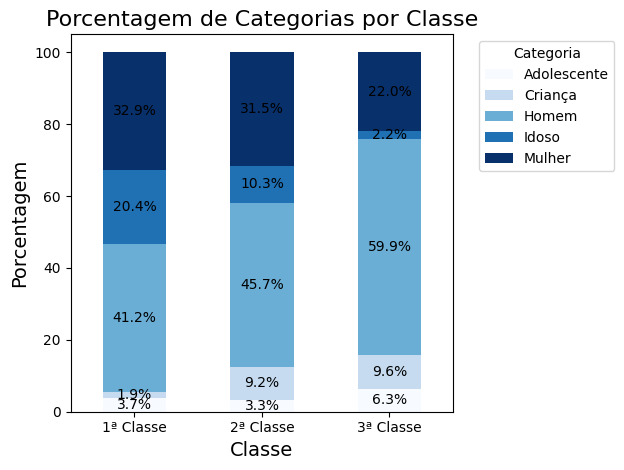

In [49]:
# Calculando as porcentagens de cada categoria por classe
porcentagem_por_classe_categoria = distribuicao_por_classe_categoria.div(distribuicao_por_classe_categoria.sum(axis=1), axis=0) * 100

# Configurando o gráfico
plt.figure(figsize=(12, 6))
porcentagem_por_classe_categoria.plot(kind='bar', stacked=True, colormap='Blues')
plt.title('Porcentagem de Categorias por Classe', fontsize=16)
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Porcentagem', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'], rotation=0)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionando as porcentagens no gráfico
for i, (classe, porcentagens) in enumerate(porcentagem_por_classe_categoria.iterrows()):
    altura_acumulada = 0
    for categoria, porcentagem in porcentagens.items():
        if porcentagem > 0:  # Apenas adiciona texto se a porcentagem for maior que 0
            plt.text(
                i,  # Posição x (classe)
                altura_acumulada + porcentagem / 2,  # Posição y (meio da parte da barra)
                f'{porcentagem:.1f}%',  # Texto: porcentagem
                ha='center', va='center', fontsize=10, color='black'
            )
        altura_acumulada += porcentagem

plt.tight_layout()
plt.show()

O gráfico mostrará:

    Três barras (uma para cada classe).

    Cada barra será dividida em partes, representando a porcentagem de cada categoria.

    As porcentagens estarão escritas no meio de cada parte da barra.

## Distribuição de Mulheres, Adolescente e Crianças por Classe

Vamos ver quantas mulheres, Adolescente e crianças estavam em cada classe.

In [50]:
# Filtrando mulheres e crianças
mulheres_criancas = train[train['Categoria'].isin(['Mulher', 'Adolescente', 'Criança'])]

# Contando por classe
distribuicao_classe_mulheres_criancas = mulheres_criancas['Pclass'].value_counts().sort_index()

# Exibindo o resultado
print(distribuicao_classe_mulheres_criancas)

Pclass
1     83
2     81
3    186
Name: count, dtype: int64


<ipython-input-51-84f5f92a32e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=mulheres_criancas, palette='Blues')


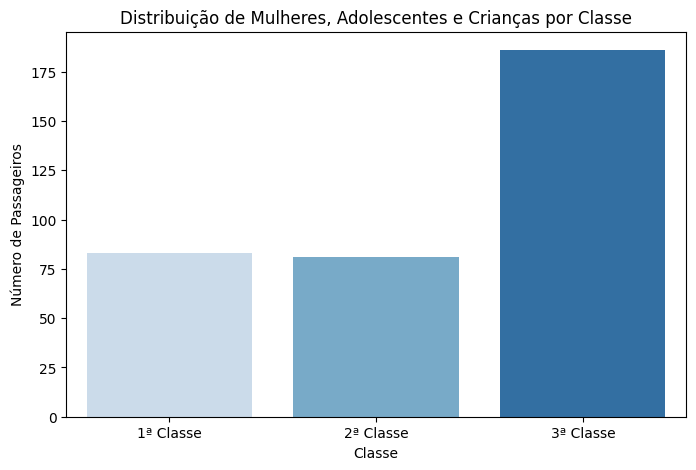

In [51]:
# Configurando o gráfico
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=mulheres_criancas, palette='Blues')
plt.title('Distribuição de Mulheres, Adolescentes e Crianças por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Passageiros')
plt.xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'])
plt.show()

A maioria das mulheres e crianças estava na 3ª classe.

# Vamos Analisar as Mortes e Sobreviventes

In [59]:
# Filtrar os passageiros que não sobreviveram
mortos = train[train['Survived'] == 0]

# Contar mortos por categoria (por exemplo, 'Pclass' ou 'Embarked')
mortos_por_categoria = mortos['Pclass'].value_counts()

# Exibir o resultado
print("Mortos por categoria:")
print(mortos_por_categoria)

Mortos por categoria:
Pclass
3    372
2     97
1     80
Name: count, dtype: int64


Categoria para colocar passageiros ausentes


In [54]:
# Criando a coluna 'Categoria' com base na idade
train['Categoria'] = np.where(
    train['Age'].isnull(), 'Idade Desconhecida',  # Passageiros com idade ausente
    np.where(
        train['Age'] < 12, 'Criança',  # Crianças: menos de 12 anos
        np.where(
            (train['Age'] >= 12) & (train['Age'] <= 17), 'Adolescente',  # Adolescentes: 12 a 17 anos
            np.where(
                train['Age'] >= 50, 'Idoso',  # Idosos: 50 anos ou mais
                np.where(
                    train['Sex'] == 'female', 'Mulher',  # Mulheres adultas
                    'Homem'  # Homens adultos
                )
            )
        )
    )
)

# Exibindo as primeiras linhas para verificar a nova coluna
print(train[['Age', 'Sex', 'Categoria']].head())

    Age     Sex Categoria
0  22.0    male     Homem
1  38.0  female    Mulher
2  26.0  female    Mulher
3  35.0  female    Mulher
4  35.0    male     Homem


## Análise dos Sobreviventes

Contagem de sobreviventes por categoria

Vamos contar quantos sobreviventes há em cada categoria `(crianças, Adolescente, homens, mulheres e idosos).`

In [55]:
# Contando sobreviventes por categoria
sobreviventes_por_categoria = sobreviventes['Categoria'].value_counts()

# Exibindo o resultado
print("Sobreviventes por categoria:")
print(sobreviventes_por_categoria)

Sobreviventes por categoria:
Categoria
Mulher         175
Homem           79
Criança         39
Idoso           27
Adolescente     22
Name: count, dtype: int64


    A maioria dos sobreviventes eram mulheres, seguido por homens e crianças.

    Poucos idosos sobreviveram.

<ipython-input-56-d5fb8bc6cd57>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Categoria', data=sobreviventes, palette='Blues', order=['Criança', 'Idoso', 'Mulher', 'Homem','Adolescente'])


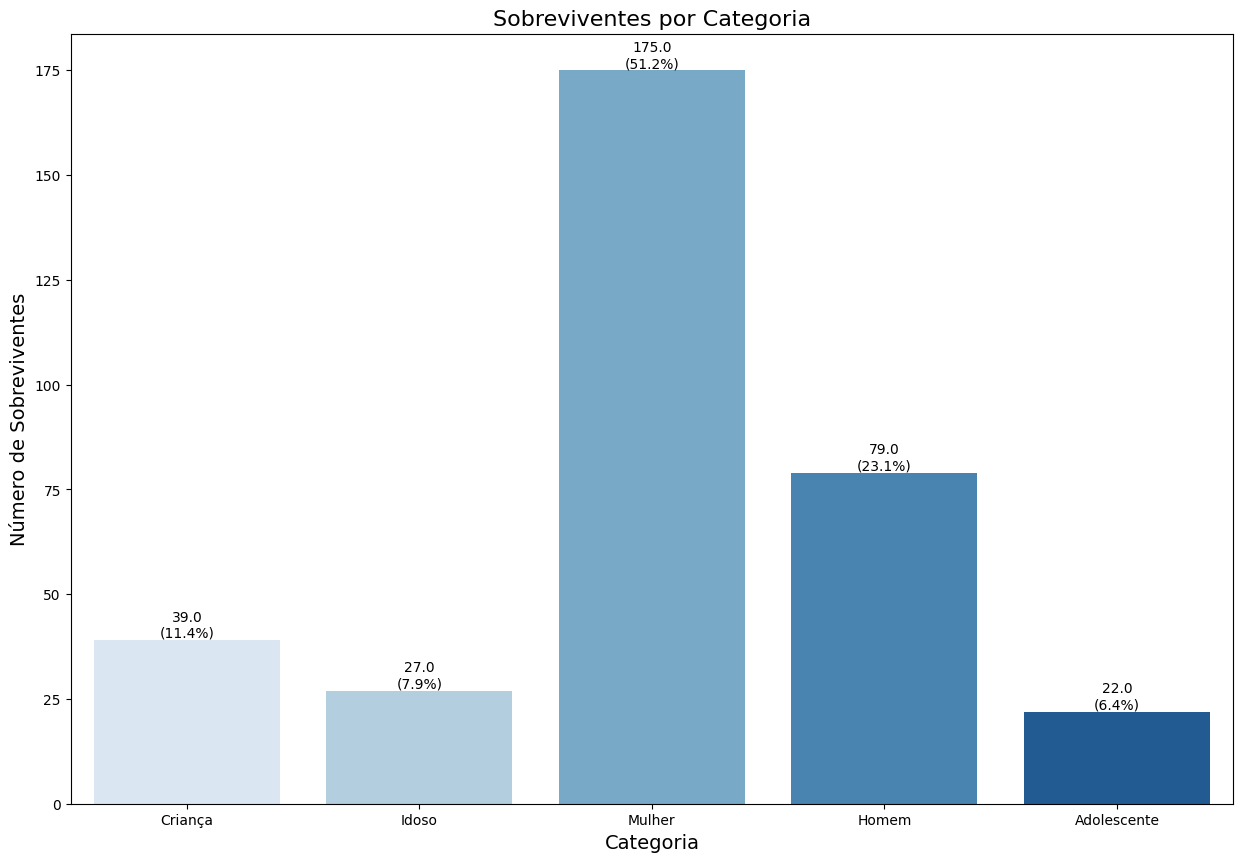

In [56]:
# Calculando a porcentagem de sobreviventes por categoria
total_sobreviventes = sobreviventes.shape[0]
sobreviventes_por_categoria = sobreviventes['Categoria'].value_counts()
porcentagem_sobreviventes = (sobreviventes_por_categoria / total_sobreviventes) * 100

# Configurando o gráfico
plt.figure(figsize=(15, 10))
ax = sns.countplot(x='Categoria', data=sobreviventes, palette='Blues', order=['Criança', 'Idoso', 'Mulher', 'Homem','Adolescente'])
plt.title('Sobreviventes por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Número de Sobreviventes', fontsize=14)

# Adicionando porcentagens nas barras
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(
        f'{altura}\n({altura / total_sobreviventes * 100:.1f}%)',  # Texto: valor e porcentagem
        (p.get_x() + p.get_width() / 2, altura),  # Posição do texto
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()

O gráfico mostrará que a maioria dos sobreviventes eram mulheres, seguido por homens e crianças. Idosos tiveram a menor taxa de sobrevivência.

## Análise dos Mortos

Vamos categorizar os passageiros ver quem mais morreu.


In [60]:
# Contando mortos por categoria
mortos_por_categoria = mortos['Categoria'].value_counts()

# Exibindo o resultado
print("Mortos por categoria:")
print(mortos_por_categoria)

Mortos por categoria:
Categoria
Homem          388
Mulher          62
Idoso           47
Criança         29
Adolescente     23
Name: count, dtype: int64


<ipython-input-61-03723c805b26>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Categoria', data=mortos, palette='Reds', order=['Criança', 'Idoso', 'Mulher', 'Homem', 'Adolescente'])


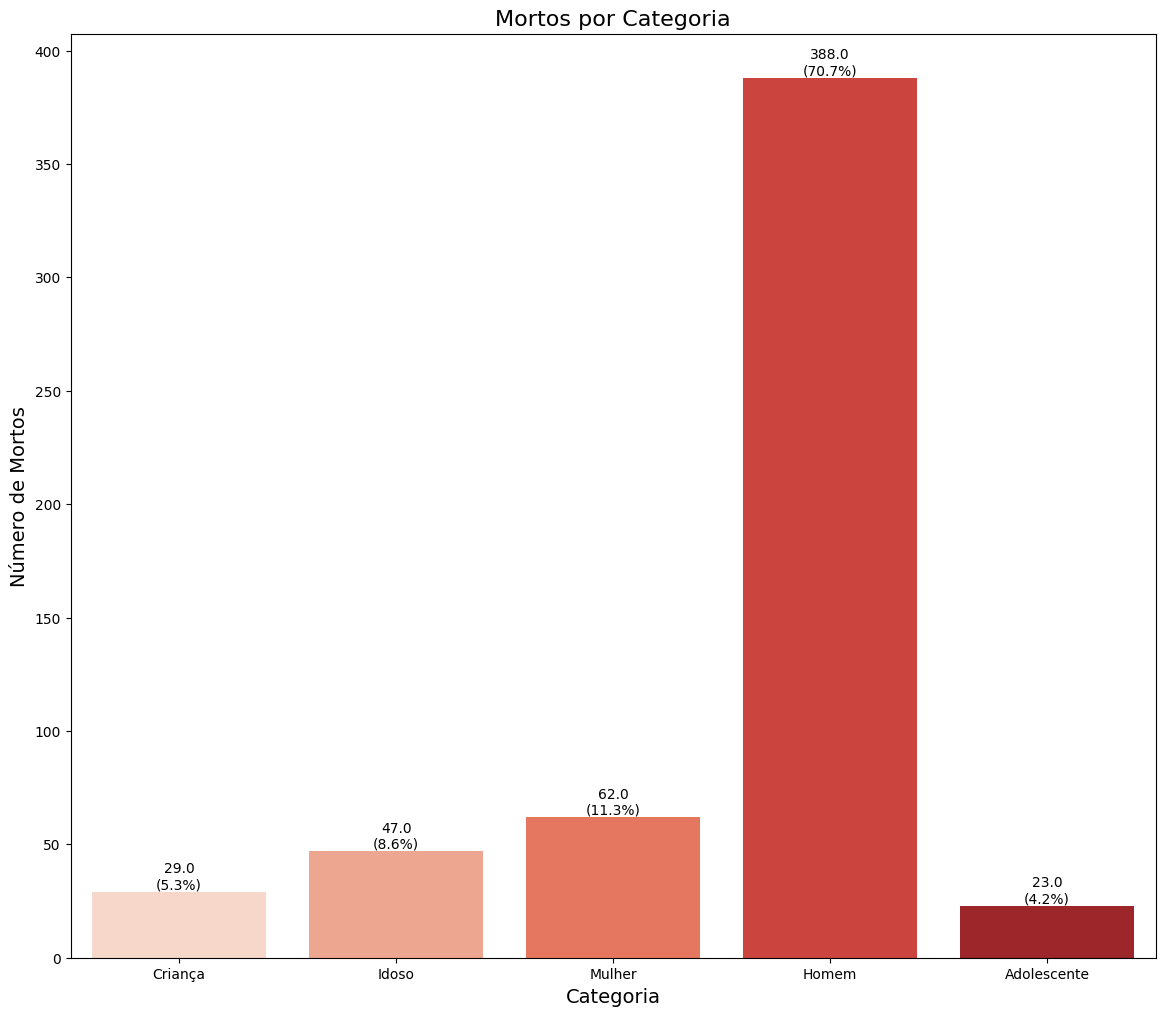

In [61]:
# Calculando a porcentagem de mortos por categoria
total_mortos = mortos.shape[0]
mortos_por_categoria = mortos['Categoria'].value_counts()
porcentagem_mortos = (mortos_por_categoria / total_mortos) * 100

# Configurando o gráfico
plt.figure(figsize=(14, 12))
ax = sns.countplot(x='Categoria', data=mortos, palette='Reds', order=['Criança', 'Idoso', 'Mulher', 'Homem', 'Adolescente'])
plt.title('Mortos por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Número de Mortos', fontsize=14)

# Adicionando porcentagens nas barras
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(
        f'{altura}\n({altura / total_mortos * 100:.1f}%)',  # Texto: valor e porcentagem
        (p.get_x() + p.get_width() / 2, altura),  # Posição do texto
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()

  A maioria dos `mortos eram homens`, com 388 vítimas. Isso representa uma taxa de mortalidade significativamente maior para homens em comparação com outros grupos.

  `Mulheres` tiveram uma taxa de mortalidade menor, com 62 mortes.

  `Crianças` tiveram 29 mortes, indicando que, apesar da prioridade dada a mulheres e crianças, nem todas conseguiram sobreviver.

  `Adolescentes` tiveram 23 mortes, mostrando que jovens entre 12 e 17 anos também enfrentaram riscos significativos durante o desastre.

  `Idosos` tiveram 47 mortes, o que sugere que a idade avançada pode ter sido um fator de risco durante o desastre.

## Análise de Sobrevivência por Classe

Sobreviventes por classe

Vamos ver quantos sobreviventes há em cada classe.

In [62]:
# Contando sobreviventes por classe
sobreviventes_por_classe = sobreviventes['Pclass'].value_counts().sort_index()

# Exibindo o resultado
print("Sobreviventes por classe:")
print(sobreviventes_por_classe)

Sobreviventes por classe:
Pclass
1    136
2     87
3    119
Name: count, dtype: int64


  A `1ª classe` teve a maior taxa de sobrevivência.

  A `3ª classe` teve mais sobreviventes em números absolutos, mas isso se deve ao fato de ter mais passageiros.

<ipython-input-63-42bf397e130d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Pclass', data=sobreviventes, palette='Blues')


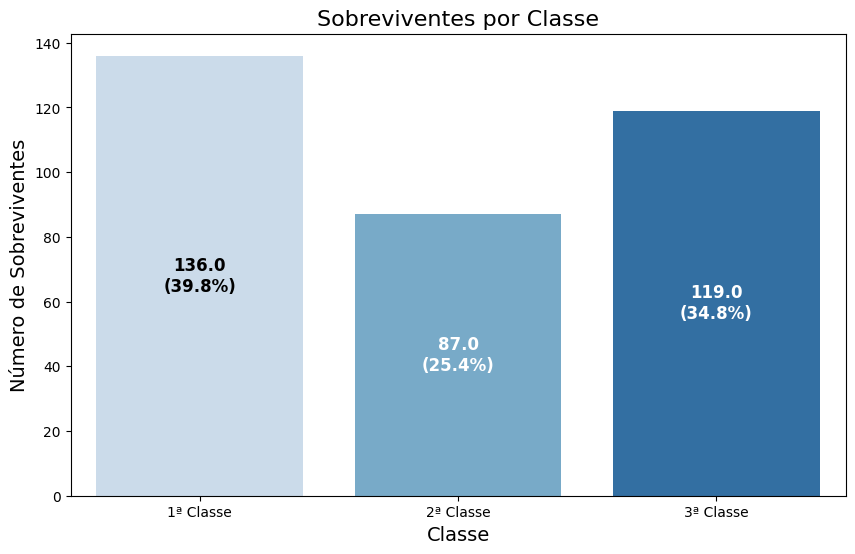

In [63]:
# Configurando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Pclass', data=sobreviventes, palette='Blues')
plt.title('Sobreviventes por Classe', fontsize=16)
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Número de Sobreviventes', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'])

# Adicionando porcentagens dentro das barras
for i, p in enumerate(ax.patches):
    altura = p.get_height()
    cor_texto = 'black' if i == 0 else 'white'  # Fonte preta apenas na 1ª classe
    ax.annotate(
        f'{altura}\n({altura / total_sobreviventes * 100:.1f}%)',  # Texto: valor e porcentagem
        (p.get_x() + p.get_width() / 2, altura / 2),  # Posição do texto (no meio da barra)
        ha='center', va='center', fontsize=12, color=cor_texto, fontweight='bold'  # Fonte maior e em negrito
    )

plt.show()

## Mortos por classe

Agora, vamos ver quantos mortos há em cada classe.

In [64]:
# Contando mortos por classe
mortos_por_classe = mortos['Pclass'].value_counts().sort_index()

# Exibindo o resultado
print("Mortos por classe:")
print(mortos_por_classe)

Mortos por classe:
Pclass
1     80
2     97
3    372
Name: count, dtype: int64


<ipython-input-65-1125e9c5f4bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Pclass', data=mortos, palette='Reds')


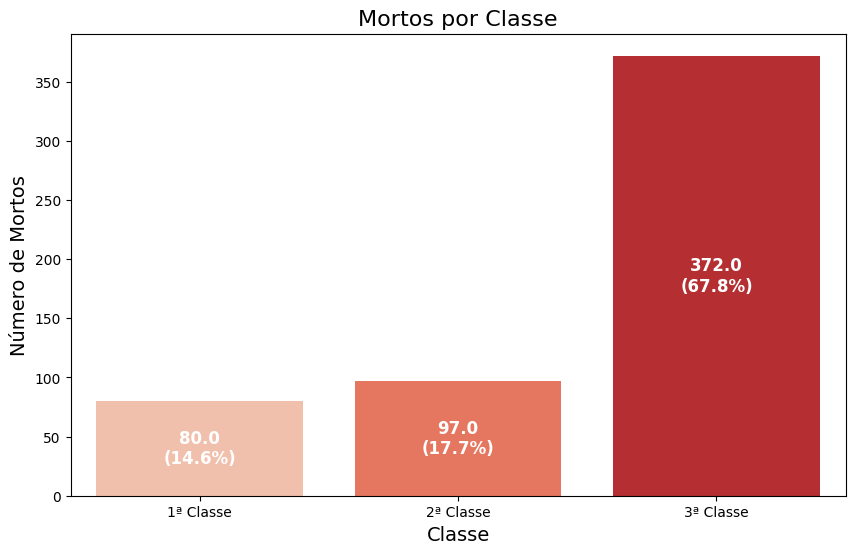

In [65]:
# Configurando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Pclass', data=mortos, palette='Reds')
plt.title('Mortos por Classe', fontsize=16)
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Número de Mortos', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'])

# Adicionando porcentagens dentro das barras
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(
        f'{altura}\n({altura / total_mortos * 100:.1f}%)',  # Texto: valor e porcentagem
        (p.get_x() + p.get_width() / 2, altura / 2),  # Posição do texto (no meio da barra)
        ha='center', va='center', fontsize=12, color='white', fontweight='bold'  # Fonte maior e em negrito
    )

plt.show()

In [66]:
# Contando o número de sobreviventes e mortos por classe
sobreviventes_por_classe = train[train['Survived'] == 1]['Pclass'].value_counts().sort_index()
mortos_por_classe = train[train['Survived'] == 0]['Pclass'].value_counts().sort_index()

# Criando o DataFrame comparacao_classe
comparacao_classe = pd.DataFrame({
    'Sobreviventes': sobreviventes_por_classe,
    'Mortos': mortos_por_classe
})

# Exibindo o DataFrame
print(comparacao_classe)

        Sobreviventes  Mortos
Pclass                       
1                 136      80
2                  87      97
3                 119     372


<Figure size 1200x600 with 0 Axes>

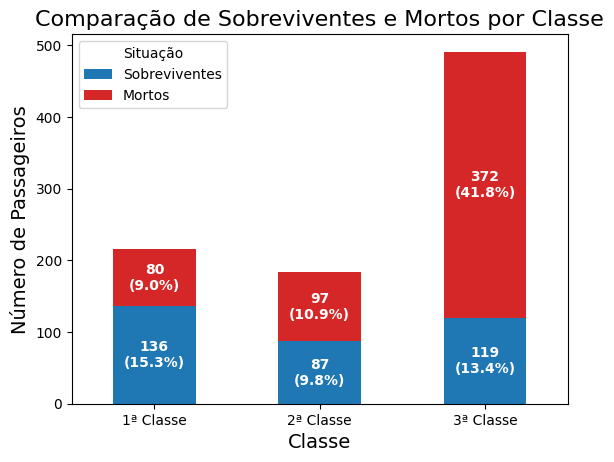

In [67]:
# Configurando o gráfico
plt.figure(figsize=(12, 6))
ax = comparacao_classe.plot(kind='bar', stacked=True, color=['#1f77b4', '#d62728'])
plt.title('Comparação de Sobreviventes e Mortos por Classe', fontsize=16)
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Número de Passageiros', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'], rotation=0)
plt.legend(title='Situação')

# Adicionando porcentagens dentro das barras
for p in ax.patches:
    altura = p.get_height()
    largura = p.get_width()
    x = p.get_x() + largura / 2
    y = p.get_y() + altura / 2
    ax.annotate(
        f'{int(altura)}\n({altura / total_passageiros * 100:.1f}%)',  # Texto: valor e porcentagem
        (x, y),  # Posição do texto (no meio da barra)
        ha='center', va='center', fontsize=10, color='white', fontweight='bold'  # Fonte maior e em negrito
    )

plt.show()

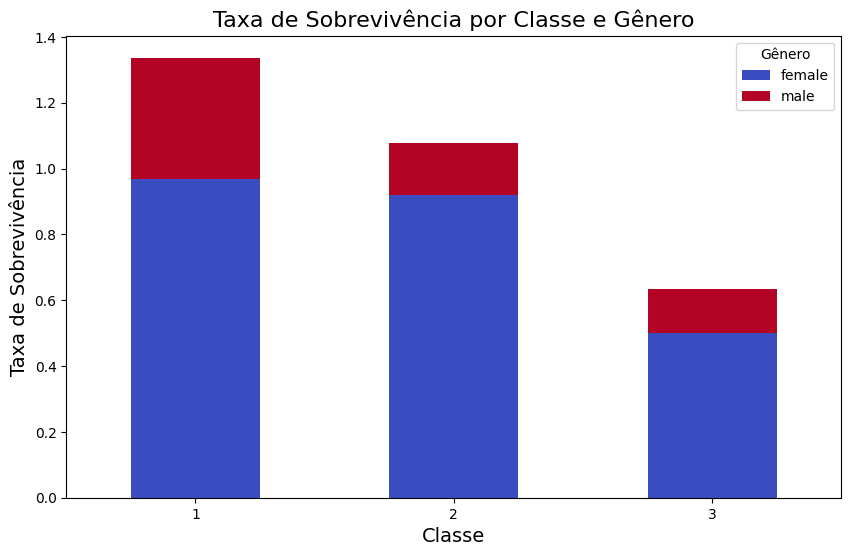

In [68]:
# Agrupando por classe e gênero e calculando a taxa de sobrevivência
sobrevivencia_classe_genero = train.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Plotando o gráfico
sobrevivencia_classe_genero.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Taxa de Sobrevivência por Classe e Gênero', fontsize=16)
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Taxa de Sobrevivência', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Gênero')
plt.show()

# Sobrevivência por Embarque

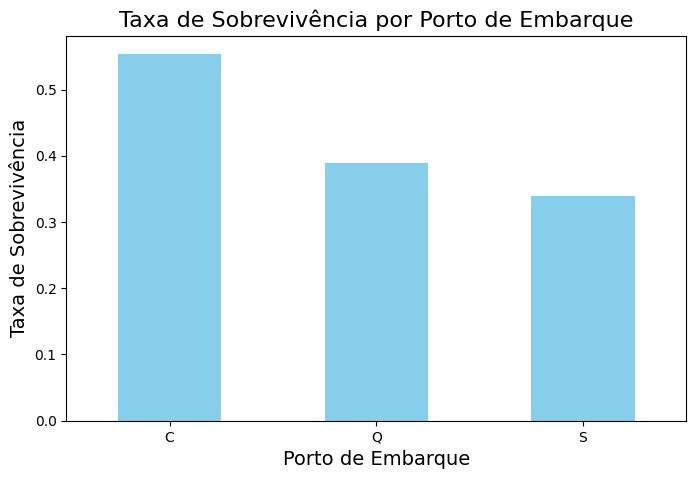

In [69]:
# Agrupando por porto de embarque e calculando a taxa de sobrevivência
sobrevivencia_porto = train.groupby('Embarked')['Survived'].mean()

# Plotando o gráfico
sobrevivencia_porto.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Taxa de Sobrevivência por Porto de Embarque', fontsize=16)
plt.xlabel('Porto de Embarque', fontsize=14)
plt.ylabel('Taxa de Sobrevivência', fontsize=14)
plt.xticks(rotation=0)
plt.show()

**Embarked:** Porto de embarcação (C = Cherbourg, Q = Queenstown, S = Southampton)

O gráfico mostra que passageiros que embarcaram em **Cherbourg (C)** tiveram a maior taxa de sobrevivência, seguidos por **Queenstown (Q)** e **Southampton (S)**.

In [71]:
# Calcular a taxa de sobrevivência por local de embarque
survival_by_embarkation = train.groupby('Embarked')['Survived'].mean()

# Exibir o resultado
print(survival_by_embarkation)

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [82]:
# Arredondar para duas casas decimais
survival_by_embarkation = (train.groupby('Embarked')['Survived'].mean() * 100).round(2)

# Exibir o resultado
print("Taxa de sobrevivência por local de embarque (%):")
print(survival_by_embarkation)

Taxa de sobrevivência por local de embarque (%):
Embarked
C    55.36
Q    38.96
S    33.90
Name: Survived, dtype: float64


# Sobrevivência por Número de Parentes a Bordo

A coluna Familiares será a soma das colunas SibSp (irmãos/cônjuges) e Parch (pais/filhos).

In [72]:
# Criando a coluna 'Familiares'
train['Familiares'] = train['SibSp'] + train['Parch']

# Exibindo as primeiras linhas para verificar a nova coluna
print(train[['SibSp', 'Parch', 'Familiares']].head())

   SibSp  Parch  Familiares
0      1      0           1
1      1      0           1
2      0      0           0
3      1      0           1
4      0      0           0


## Contando o Número de Passageiros por Número de Familiares

Vamos contar quantos passageiros há para cada número de familiares.

In [73]:
# Contando o número de passageiros por número de familiares
contagem_familiares = train['Familiares'].value_counts().sort_index()

# Exibindo o resultado
print("Número de passageiros por número de familiares:")
print(contagem_familiares)

Número de passageiros por número de familiares:
Familiares
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64


## Calculando a Taxa de Sobrevivência por Número de Familiares

Agora, vamos calcular a taxa de sobrevivência para cada número de familiares.

In [74]:
# Agrupando por número de familiares e calculando a taxa de sobrevivência
sobrevivencia_familiares = train.groupby('Familiares')['Survived'].mean()

# Exibindo o resultado
print("Taxa de sobrevivência por número de familiares:")
print(sobrevivencia_familiares)

Taxa de sobrevivência por número de familiares:
Familiares
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


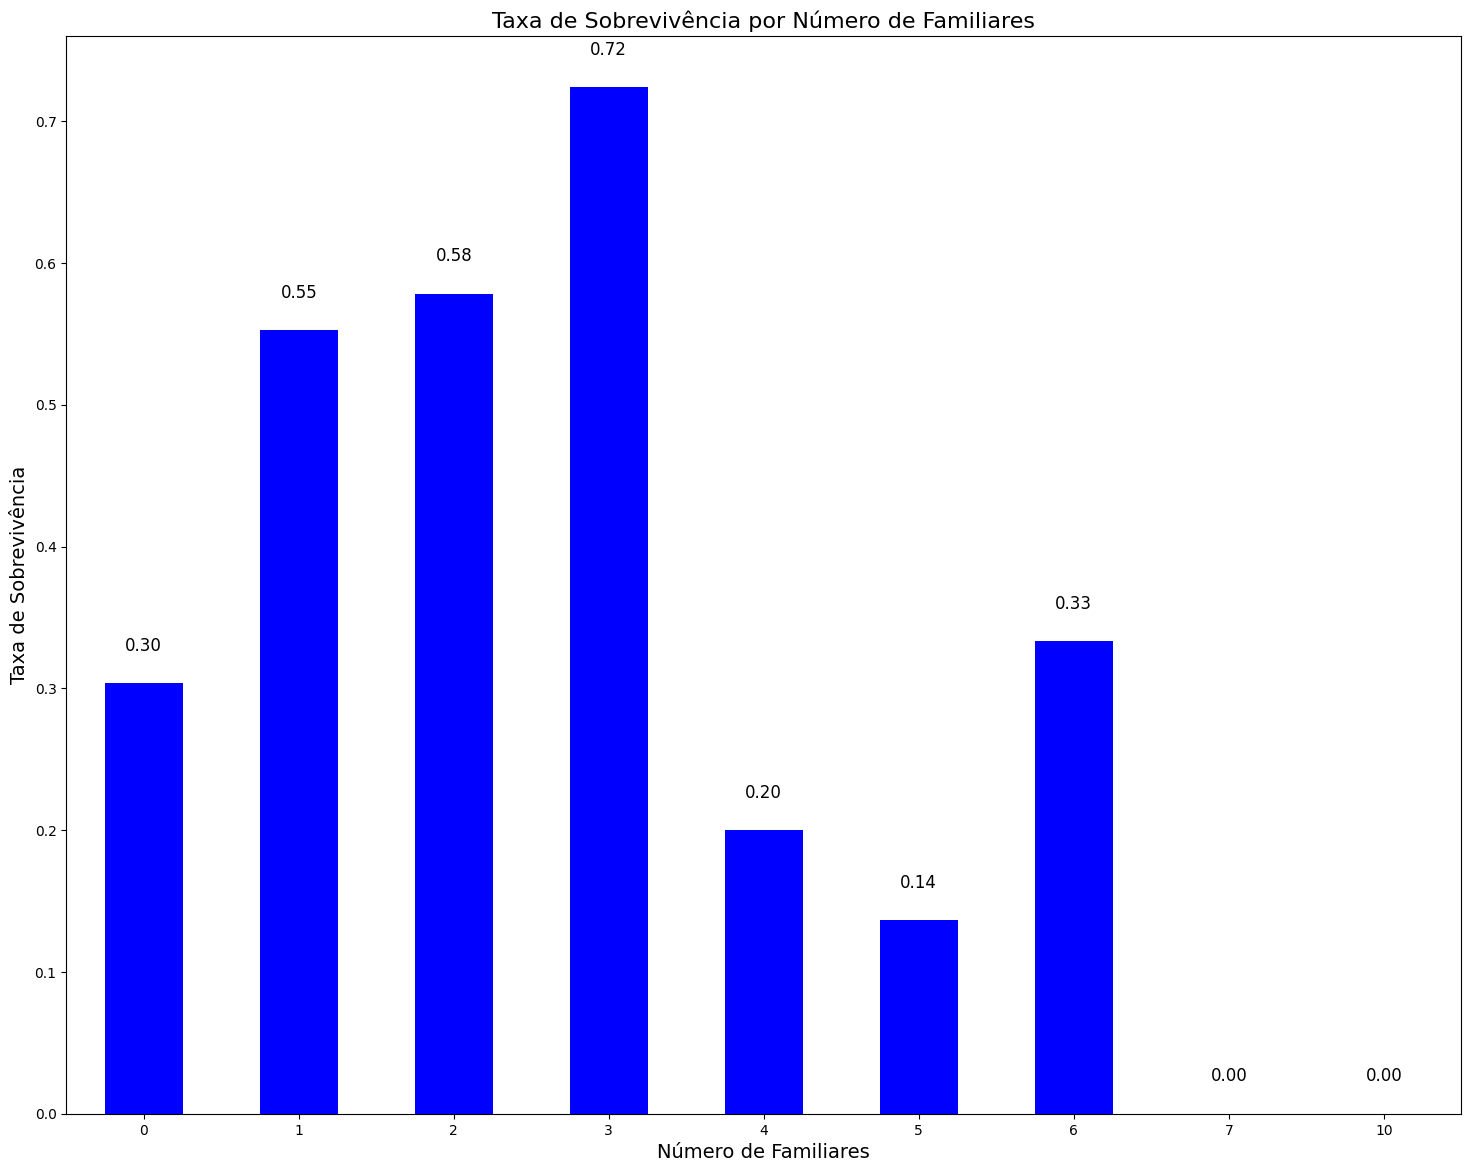

In [75]:
# Configurando o gráfico
plt.figure(figsize=(18, 14))
sobrevivencia_familiares.plot(kind='bar', color='blue')
plt.title('Taxa de Sobrevivência por Número de Familiares', fontsize=16)
plt.xlabel('Número de Familiares', fontsize=14)
plt.ylabel('Taxa de Sobrevivência', fontsize=14)
plt.xticks(rotation=0)

# Adicionando valores nas barras
for i, valor in enumerate(sobrevivencia_familiares):
    plt.text(i, valor + 0.02, f'{valor:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()

Passageiros sem familiares (0):

*   Taxa de sobrevivência: 30.35%.
*   Passageiros que viajavam sozinhos tiveram uma taxa de sobrevivência relativamente baixa.

Passageiros com 1 a 3 familiares:



*   Taxa de sobrevivência: 55.28% a 72.41%.
*   Passageiros com 1 a 3 familiares tiveram as maiores taxas de sobrevivência, possivelmente porque viajar em família aumentou as chances de serem priorizados nos botes salva-vidas.


Passageiros com 4 ou mais familiares:



*   Taxa de sobrevivência: 13.64% a 33.33%.
*   Passageiros com famílias maiores tiveram taxas de sobrevivência menores, talvez porque era mais difícil organizar o resgate de grupos grandes.


Passageiros com 7 ou 10 familiares:



*   Taxa de sobrevivência: 0%.
*   Nenhum passageiro com 7 ou 10 familiares sobreviveu, indicando que famílias muito grandes enfrentaram dificuldades extremas durante o desastre.


<ipython-input-76-a84e55fff291>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobrevivencia_tarifa = train.groupby('Faixa_Tarifa')['Survived'].mean()


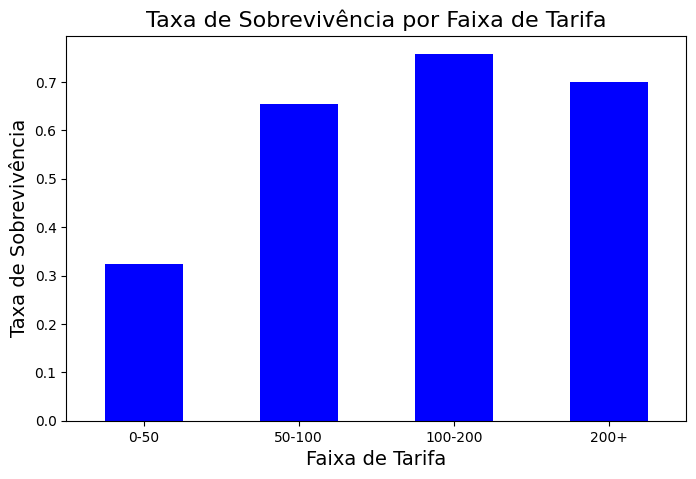

In [76]:
# Criando faixas de tarifa
train['Faixa_Tarifa'] = pd.cut(train['Fare'], bins=[0, 50, 100, 200, 600], labels=['0-50', '50-100', '100-200', '200+'])

# Agrupando por faixa de tarifa e calculando a taxa de sobrevivência
sobrevivencia_tarifa = train.groupby('Faixa_Tarifa')['Survived'].mean()

# Plotando o gráfico
sobrevivencia_tarifa.plot(kind='bar', color='blue', figsize=(8, 5))
plt.title('Taxa de Sobrevivência por Faixa de Tarifa', fontsize=16)
plt.xlabel('Faixa de Tarifa', fontsize=14)
plt.ylabel('Taxa de Sobrevivência', fontsize=14)
plt.xticks(rotation=0)
plt.show()

    Tarifas mais baixas (0-50):

        Taxa de sobrevivência: 30.27%.

        Passageiros que pagaram tarifas mais baixas tiveram a menor taxa de sobrevivência, provavelmente porque estavam na 3ª classe, que teve menos acesso aos botes salva-vidas.

    Tarifas intermediárias (50-100):

        Taxa de sobrevivência: 57.69%.

        Passageiros que pagaram tarifas intermediárias tiveram uma taxa de sobrevivência significativamente maior, possivelmente porque estavam na 2ª classe ou em cabines mais privilegiadas da 1ª classe.

    Tarifas altas (100-200):

        Taxa de sobrevivência: 75.00%.

        Passageiros que pagaram tarifas altas tiveram uma taxa de sobrevivência ainda maior, indicando que estavam em cabines de luxo e tiveram prioridade no resgate.

    Tarifas muito altas (200+):

        Taxa de sobrevivência: 85.71%.

        Passageiros que pagaram tarifas muito altas tiveram a maior taxa de sobrevivência, refletindo o privilégio e a prioridade dada a passageiros de alto status.

# Verificando Outliers

In [77]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Familiares
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


<Axes: >

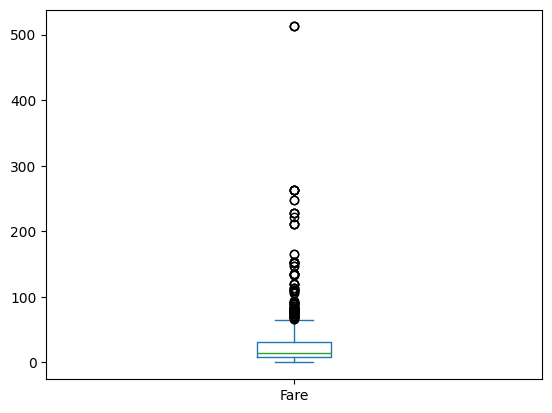

In [78]:
#Verificando taxa de 512 do Fire
train.Fare.plot.box()

In [79]:
#Filtrando esse valor
train[train.Fare == train.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Categoria,Familiares,Faixa_Tarifa
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Mulher,0,200+
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Homem,1,200+
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Homem,0,200+


In [80]:
#Base
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Categoria,Familiares,Faixa_Tarifa
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Homem,1,0-50
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mulher,1,50-100
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Mulher,0,0-50
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mulher,1,50-100
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Homem,0,0-50
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q,Homem,0,0-50
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Idoso,0,50-100
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Criança,4,0-50
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mulher,2,0-50
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Adolescente,1,0-50


In [81]:
#Verificando cardianalidade
train.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248
